<a href="https://colab.research.google.com/github/tiasaxena/ML-Notebooks/blob/main/KNN_Implementaion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **KNN Implementation**

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

cmap = ListedColormap(['#FF0040', '#76FF76', '#9999FF']) # shades of red, green, blue
markers = ("x", "o", "s")

In [ ]:
iris_dataset = load_iris()
X, y = iris_dataset.data, iris_dataset.target
print("____________Features_______________\n")
print(iris_dataset.feature_names)
print("___________________________________\n")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

____________Features_______________

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
___________________________________



In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train[0]

((120, 4), (30, 4), (120,), (30,), array([4.6, 3.6, 1. , 0.2]))

In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
  """
  Implementation of KNN algorithm
  """
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):
    # Compute distances
    distances = [euclidean_distance(x, x2) for x2 in self.X_train]
    # Get k nearest samples, labels
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    # Get the most common/majority label
    from collections import Counter
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [ ]:
k = 5
knn_model = KNN(k)
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)

# Find the accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"The accuracy of the KNN model with k = {k} is {accuracy:.2f}")

The accuracy of the KNN model with k = 5 is 1.00


class_idx: [0 1 2]
labels: ['setosa' 'versicolor' 'virginica']


<ipython-input-24-253795e00857>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], c=cmap(index), marker=markers[index], label=labels[cls])


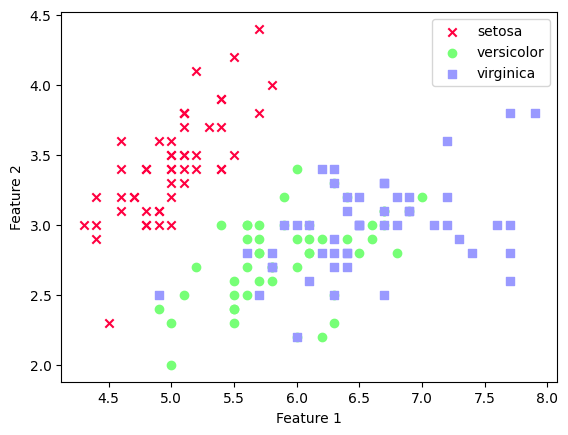

In [ ]:
class_idx = np.unique(y)
labels = iris_dataset.target_names

print(f'class_idx: {class_idx}')
print(f'labels: {labels}')

for index, cls in enumerate(class_idx):
  plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], c=cmap(index), marker=markers[index], label=labels[cls])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
